<div style="align: left"><a href="http://www.hftconnect.com/"><img src="HFTC.png" align="left" width="122"></a></div>

<br /> &nbsp; <br />
## 20 September 2018
## Machine Learning and Big Data
## Druce Vertes

<div style="align: left"><a href="http://www.streeteye.com/"><img src="dv3-120.png" align="left" width="122"></a></div>


# Agenda

- Some observations on big data and machine learning 
  - What is big data? How is machine learning different from statistics?
- A roadmap for applying machine learning - code examples, resources
- Some fun examples


<div style="align: left"><a href="https://twitter.com/random_walker/status/976836626121977858"><img src="Narayanan.png" align="left" width="301"></a></div>

More things change, the more they remain the same

Buzzwords represent fashionable variations on old themes, big collars turn into polos and fleece vests.

Title inflation 
- Excel monkey -> Business Intelligence Analysts
- SQL report jockeys -> Data Scientists
- Forecasters -> Machine learning engineers, AI researchers



    

Thesis: Nothing new under the sun, it's all just fashion.

<div style="align: center"><img src="220px-Gordon_Gekko.jpg" align="left" width="318"><img src="fleecevest.png" align="right" width="210"></a></div>


Antithesis: Singularity


<div style="align: left"><a href="https://en.wikipedia.org/wiki/The_Singularity_Is_Near"><img src="The-Singularity-Is-Near.jpg" align="center" width="258"></a></div>
    
    


“It is said that there are no sudden changes in nature, and the common view has it that when we speak of a growth or a destruction, we always imagine a gradual growth or disappearance. Yet we have seen cases in which the alteration of existence involves not only a transition from one proportion to another, but also a transition, by a sudden leap, into a … qualitatively different thing; an interruption of a gradual process, differing qualitatively from the preceding, the former state” - G. W. F. Hegel (1770-1831)

First dude to talk about the hype cycle and the tipping point


Many ML algorithms go back decades, we had a lot of the pieces but recently things took off:

- Much better hardware (especially Nvidia GPUs)
- Better algorithms (efficient backpropagation, new neural network architectures)
- Much more data from digital everything

Virtuous cycle
- Early successes 
- -> More research
- -> More deployed apps, speech recognition, image recognition, machine translation, self-driving cars, robots,
- -> More data, more investment in hardware and algos
- -> Huge advances in many applications
- -> Huge growth in investment in research, hardware, perpetuating the cycle
- -> General AI and beyond?

Synthesis - 

<div style="align: left"><a href="https://www.gartner.com/smarterwithgartner/5-trends-emerge-in-gartner-hype-cycle-for-emerging-technologies-2018/"><img src="PR_490866_5_Trends_in_the_Emerging_Tech_Hype_Cycle_2018_Hype_Cycle.png" align="left"></a></div>

<div><a href="https://en.wikipedia.org/wiki/Dialectic#Hegelian_dialectic"><img src="Hegelian-Dialectic.jpg" align="left" width="301"></a></div>



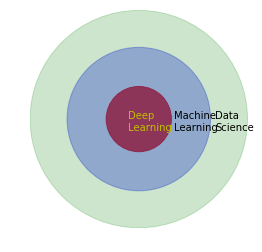

In [96]:
import matplotlib.pyplot as plt

circle3 = plt.Circle((0.5, 0.5), 0.5, color='g', alpha=0.2)
circle2 = plt.Circle((0.5, 0.5), 0.33, color='blue', alpha=0.3)
circle1 = plt.Circle((0.5, 0.5), 0.15, color='r', alpha=0.8)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.annotate('Deep\nLearning', xy=(0.45, 0.45), color = 'y')
ax.annotate('Machine\nLearning', xy=(0.66, 0.45))
ax.annotate('Data\nScience', xy=(0.85, 0.45))

plt.axis('off')

plt.show()

![subsets.png](subsets.png)

- Data science 
  - Anything involving data: collecting, scrubbing, structuring, feature engineering, visualization
- Machine learning
  - Anything that learns from features without explicit programming - self optimizing algorithm
- Deep learning
  - Many machine learning algos (neural net layers) trained end to end on a complex task
  - Human like performance in a hard or uncertain domain
  - Can seem like magic but in a narrow domain, constant, non-adversarial context
- Strong general AI
  - Human-like performance in broad, highly variable, adversarial context
  - Still a pipe dream: 
      - We still segregate robots on factory floor for safety
      - Algorithms often easy to defeat in real world  
  
Probably a log scale in terms of how much data you need: 
- Machine learning: simple algos can do something with dozens or thousands of data points 
- Deep learning: typically millions of data points
- General AI ??? billions ???
  

# Machine Learning = Statistics For Street Fighting


# When in doubt, use brute force - Ken Thompson
# &nbsp;
![xx](thompson.jpg)


In [ ]:
Just think of yourself as Batman

# I do nothing that a man of unlimited funds, superb physical endurance, and maximum scientific knowledge could not do. - Batman

# It's sometimes difficult to think clearly when you're strapped to a printing press. - also Batman

![Batman](batman.jpg)



# Statistics:
## Descriptive + inferential statistics: 
## - What can we say about data that's true? 
## - What can we infer about future data?

# Machine Learning: 
## Predict as accurately as possible, unconstrained by data and computing resources

# Statistical prediction and inference - simple regression

## - You have some data
## - You fit a line, get a slope and an intercept
## - Get some analysis of variation - ANOVA


In [106]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
from plotly.figure_factory import create_table
init_notebook_mode(connected=True)

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create a data set, sin wave plus random noise
nobs = 4000
x = np.linspace(0, 6*np.pi, num=nobs)
y = -np.cos(x) + x*0.05 + np.random.normal(0, 0.25, nobs)
z = np.sin(x) +  x*0.05 + np.random.normal(0, 0.25, nobs)

df = pd.DataFrame({'x' : x,'y': y,'z': z})

# chart it

def mychart(*args):

    # pass some 2d n x 1 arrays, x, y, z
    
    # 1st array is independent vars
    # reshape to 1 dimensional array
    x = args[0].reshape(-1)
    
    # following are dependent vars plotted on y axis
    data = []
    for i in range(1, len(args)):
        data.append(Scatter(x=x,
                            y=args[i].reshape(-1),
                            mode = 'markers',
                            marker = dict(size = 2)                            
                           ))

    layout = Layout(
        yaxis=dict(
            autorange=True))
    
    fig = Figure(data=data, layout=layout)
    
    return iplot(fig) # , image='png' to save notebook w/static image   
    
mychart(x,y)

In [66]:
#table = create_table(df)
#iplot(table, filename='mydata')

formula = 'y ~ x'
model = ols(formula, df).fit()
ypred = model.predict(df)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     522.0
Date:                Mon, 17 Sep 2018   Prob (F-statistic):          1.06e-108
Time:                        20:32:36   Log-Likelihood:                -4522.8
No. Observations:                4000   AIC:                             9050.
Df Residuals:                    3998   BIC:                             9062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.024     -0.050      0.960      -0.048       0.045
x              0.0498      0.002     22.848      0.000       0.045       0.054
==============================================================================
Omnibus:                     2891.410   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.898
Skew:                           0.007   Prob(JB):                     2.67e-51
Kurtosis:                       1.818   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
mychart(x,y,np.array(ypred))

# Potential pitfalls of the OLS model

# Violations of assumptions of OLS: Anscombe's Quartet


### These all have the same regression line and descriptive statistics

<div style="align: left"><a href="https://en.wikipedia.org/wiki/Anscombe%27s_quartet"><img src="850px-Anscombe's_quartet_3.svg.png" align="left"></a>

### You can take this further and construct pretty crazy stuff

### The Datasaurus Dirty Dozen

<div style="align: left"><a href="https://www.autodeskresearch.com/publications/samestats"><img src="datasaurus4.png" align="left" width="480"></a>

## For traditional statistical inference, you want
- A valid a priori linear model
- Normally distributed errors

## If not
- If your model is not correctly specified, your regression line is not as predictive as it should be.
- If you don't have normally distributed errors, your p-values and inference about future distributions are wrong because your errors are not random. 
- (Even if future is like the past (stationarity))

## You need to know what you are doing. 

- Visualize your raw data and errors
- Sanity-check your model, 
- Use appropriate tests to don't have violations of assumptions of OLS:
  - Nonlinearity
  - Heteroskedascisity
  - Autocorrelation
  - Multicollinearity
  - Other non-normality of errors

If you don't have a good linear model, you need to find a better model, transform the data, add variables. 
If your data violates the assumptions of OLS, you need to understand why and fix it.
You can't just throw data at statistical models without knowing what you're doing.

# "With four parameters you can fit an elephant to a curve, with five you can make him wiggle his trunk" - John von Neumann

<div style="align: left"><a href="http://wavefunction.fieldofscience.com/2015/02/derek-lowe-to-world-beware-of-von.html"><img src="elephant.jpg" align="left"></a>


# OLS is  not very good when you throw a lot of predictors at it, and don't have a lot of data
 - squares
 - curse of dimensionality
 - exponential growth is a powerful thing
 - underlies growth in funds ... underlies encryption
 - more dimensions you add, the more likely that you have an outlier along some dimension
 - outliers have a lot of leverage when you are minimizing squared error
 - show a long polynomial
 - c(deg+n, n)
 - you have 20 parameters, one of them will have a 5% significant p-value
 - This is really the crux of why machine learning (or robust statistics) tends to predict better, there's a lot of hard work and cheap tricks to ensure outliers and spurious correlations don't lead your model astray. 

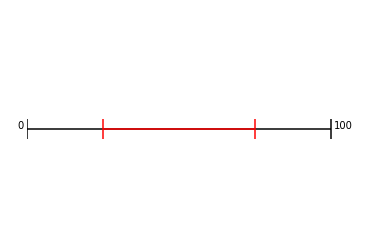

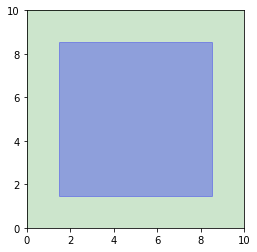

In [95]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,11)
ax.set_ylim(0,11)

# draw lines
xmin = 0
xmax = 10
y = 5
height = 1

plt.hlines(y, xmin, xmax)
plt.hlines(y, 2.5, 7.5, color='r')

plt.vlines(xmin, y - height / 2., y + height / 2.)
plt.vlines(xmax, y - height / 2., y + height / 2.)
plt.vlines(2.5, y - height / 2., y + height / 2., color='r')
plt.vlines(7.5, y - height / 2., y + height / 2., color='r')

# add numbers
plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
plt.text(xmax + 0.1, y, '100', horizontalalignment='left')
plt.axis('off') 
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.axis('on')
#plt.axes().set_aspect('equal', 'datalim')

offset = np.sqrt(50)/2

ax.set_xlim(0,10)
ax.set_ylim(0,10)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

square1 = plt.Rectangle((0, 0), width=10, height=10, color='g', alpha=0.2)
square2 = plt.Rectangle((5-offset, 5-offset), width=offset*2, height=offset*2, color='blue', alpha=0.3)

ax.add_artist(square1)
ax.add_artist(square2)


plt.show()



In [118]:
sz = 0.5 ** (1/3)
start = (1-sz)/2
end = start + sz
print(start)
print(end)
data = [
    Mesh3d(
        x = [start, start, end, end, start, start, end, end],
        y = [start, end, end, start, start, end, end, start],
        z = [start, start, start, start, end, end, end, end],
        colorscale = [[0, 'rgb(255, 0, 255)'],
                    [0.5, 'rgb(0, 255, 0)'], 
                      [1, 'rgb(0, 0, 255)']],
        intensity = [0, 0.142857142857143, 0.285714285714286, 
                     0.428571428571429, 0.571428571428571, 
                     0.714285714285714, 0.857142857142857, 1],
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        name='y',
        showscale=True
    )
]
layout = Layout(
    xaxis=plotly.graph_objs.layout.XAxis(
        title='x',
    ),
    yaxis=plotly.graph_objs.layout.YAxis(
        title='y',
        range=[0, 1]        
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig, filename='3d-mesh-cube-python')

0.1031497370079501
0.8968502629920498


In [125]:
[0.5 - (0.5 ** (1/n)/2) for n in range(1,50)]

[0.25,
 0.1464466094067262,
 0.1031497370079501,
 0.07955179237314275,
 0.06472471835193794,
 0.05455064092983036,
 0.04713816786804664,
 0.04149797839766439,
 0.03706264385635477,
 0.033483504231596295,
 0.030534544669146846,
 0.028062843659153236,
 0.02596124283041429,
 0.02415242349469021,
 0.02257919804479175,
 0.02119835965071315,
 0.01997665657260339,
 0.018888081552927427,
 0.017912001028752456,
 0.0170318355375772,
 0.016234110738054197,
 0.015507763049368795,
 0.014843623625100943,
 0.01423402942319707,
 0.013672526293857235,
 0.013153639651282911,
 0.012672695438784465,
 0.012225678973713405,
 0.01180912264088907,
 0.011420015782877047,
 0.011055731832283644,
 0.010713968956149955,
 0.010392701376999325,
 0.010090139195281844,
 0.009804695030113275,
 0.009534956165542507,
 0.009279661170703002,
 0.00903768017736456,
 0.008807998164367947,
 0.008589700727374472,
 0.008381961913256186,
 0.008184033777904998,
 0.00799523738920177,
 0.007814955047072136,
 0.007642623532784387,
 0

## Machine Learning: how you predict when you are no longer constrained by 
 - Data size - effectively unbounded data
 - Computational complexity - effectively unbounded computation capacity
 


In [ ]:
example?
https://github.com/druce/Machine-learning-for-financial-market-prediction/blob/master/Replicate%20Paper%20by%20Rapach%2C%20Strauss%2C%20Tu%2C%20Zhou.ipynb
    https://github.com/druce/Machine-learning-for-financial-market-prediction/blob/master/Replicate%20Paper%20by%20Rapach%2C%20Strauss%2C%20Tu%2C%20Zhou-4-Way%20Classification.ipynb


In [ ]:
two key concepts - bias/variance tradeoff

In [ ]:
ROC curve


# Machine Learning paradigm vs Statistics

| Statistics | Machine learning |
| --- | --- |
| Small data | Big data (need a lot of data for complex models - exponential with #variables/kinks) |
|Optimize model in-sample statistics | Optimize out-of-sample statistics |
|Assume linear (or some a priori functional form)  |  Algorithm finds model |
|Choose predictors and form (parsimoniously so you don't chase outliers) | Algorithm chooses from many predictors and models (as greedily as possible while being robust) |
|Optimize as much as possible  | Worse is usually better  |
|Can't overfit a parsimonious model with limited data| Use regularization to tune and find optimal balance between bias and variance|
|Inference: description, prediction, attribution | Focus on prediction - attribution often opaque |
|You need to know what you are doing | You need to know what you are doing |




# In statistics, a lot of times you get not-very-good answers and know why: your data does not fit the assumptions of OLS. In machine learning, you often get better answers and you don’t really know why they are so good.


- People talk about machine learning and complex models they go, ooh, you're data mining, overfitting: actually very focused on being robust, not chasing outliers, avoiding overfitting
- You can overfit with linear models 
- Power poses - p-hacking - small sample sizes
- Ted talk - NY magazine
- With adequate data and good methodology you avoid overfitting

# In statistics, you get not very good predictions and you know why they are not very good (simple model (bias), violations of assumptions of OLS)

# In machine learning, you get very good predcitions but you don't know why they are very good ( complex models, opaque attribution)

# ML sometimes needs big data but what do we mean by big data?

## Computational perspective
- Big data is data that doesn't fit in a box: a single computer's memory
 - Google - canonical example
   - Query gets multiplexed to dozens (100s?) of servers in a cluster, which each contain a shard of the index
   - Results, including excerpts (!) get collected and sorted by relevance
   - SERP gets built and returned in a fraction of a second
   - By employing PageRank and this at the time novel cluster architecture which caches the entire Internet and its full-text index, Google achieved a quantum leap in web scale Internet services
- Big data is where you need to use clusters
   

## You've come a long way, baby: current biggest AWS instance

<div style="align: left"><a href="https://aws.amazon.com/ec2/pricing/on-demand/"><img src="aws.png" align="left"></a>

These days big data has to be *REALLY BIG* before you *need* the Google cluster/Hadoop cluster approach. 

For various reasons it might make sense to use a scale-out cluster as opposed to scale-up huge instances. Big data can refer to this type of stack, even if the data is not truly big data like Google or Facebook in a computational sense.

## Data science perspective

Big Data:
- Sufficient data that you aren't constrained in terms of model complexity
- Sufficient data that p-values are irrelevant because you can make them arbitrarily small by increasing sample size.

See also https://datascience.berkeley.edu/what-is-big-data/ - A lot of definitions boiling down to, size of data that was unreasonable in the PC era but tractable in cloud environment. Big enough for machine learning. A lot of people say big data when they mean machine learning, modern predictive analytics.


Suppose you can sample unlimited data and have unbounded computational capacity
walk through an example

you sample a large set of training data
try all the models
sample a new data set of cross-validation and tune the models
 - train on training data
 - choose parameters based on cross-validation data
finally 
 - evaluate your model on test data

 - Supervised
 - Unsupervised
 - Reinforcement learning


# Supervised
You have labeled data: a sample of ground truth with features and labels. You estimate a model that predicts the labels using the features. Alternative terminology: predictor variables and target variables. You predict the values of the target using the predictors.

*Regression.* The target variable is numeric. Example: you want to predict the crop yield based on remote sensing data. Algorithms: linear regression, polynomial regression, generalized linear models.

*Classification.* The target variable is discrete or categorical. Example: you want to detect the crop type that was planted using remote sensing data. Or Silicon Valley’s “Not Hot Dog” application.1 Algorithms: Naïve Bayes, logistic regression, discriminant analysis, decision trees, random forests, support vector machines, neural networks of many variations: feed-forward NNs, convolutional NNs, recurrent NNs.
            

Unsupervised learning – You have a sample with unlabeled information. No single variable is the specific target of prediction. You want to learn interesting features of the data:

Clustering. Which of these things are similar? Example: group consumers into relevant psychographics. Algorithms – k-means, hierarchical clustering.
Anomaly detection. Which of these things are different? Example: credit card fraud detection. Algorithms: k-nearest-neighbor.
Dimensionality reduction. How can you summarize the data in a high-dimensional data set using a lower-dimensional dataset which captures as much of the useful information as possible (possibly for further modeling with supervised or unsupervised algorithms)? Example: image compression. Algorithms: principal component analysis (PCA), neural network autoencoders.
Representation - Embeddings, recommendation engines - take a large body of text or movies with a graph of relationships between them, create dense vectors describing words, movies.


Reinforcement learning – You are presented with a game or real-world tax that responds sequentially or continuously to your inputs, and you learn to maximize an objective through trial and error.

You might think unlabeled/labeled covers everything. But reinforcement learning is sort of 'meta' supervised learning. 

The algorithm has to go out and explore the problem space and create its own high, for instance by creating and filling out a markov decision matrix to create a policy function. Then it labels that matrix with the outcomes that followed. Then it optimizes by gradient descent, not over predictions vs. labels, but over a space of policy functions, that move toward the good outcomes as rapidly as possible. 

So it's sort of like supervised learning but at a much higher level. You get a big negative reinforcement when you screw up, run a stop sign, run over a pedestrian. You get a positive reinforcements as you navigate to your destination safely. From those high level labels, you have to figure out how to represent the game using a policy function, what high-level abstractions to use, and what policy to use.

it's very important and sufficiently that nowadays people put it in its own category. But 
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
https://www.youtube.com/watch?v=79pmNdyxEGo

In [ ]:
more amazing examples - style transfer, embeddings, rnn prediction, GANs, reinforcement learning
https://www.ostagram.me/static_pages/lenta?order=likes&style_id=563604
https://quickdraw.withgoogle.com/
https://ai.googleblog.com/2018/05/duplex-ai-system-for-natural-conversation.html?m=1
    
embeddings
https://blog.conceptnet.io/posts/2017/how-to-make-a-racist-ai-without-really-trying/
economics examplee

https://deepmind.com/blog/alphago-zero-learning-scratch/?utm_source=mybridge&utm_medium=blog&utm_campaign=read_more

DOTA 2
https://www.youtube.com/watch?v=wiOopO9jTZw
https://blog.openai.com/more-on-dota-2/?utm_source=mybridge&utm_medium=blog&utm_campaign=read_more
    
https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe
    

In [ ]:
https://tcwang0509.github.io/pix2pixHD/?utm_campaign=read_more&utm_medium=blog&utm_source=mybridge
https://medium.mybridge.co/learn-to-build-a-machine-learning-application-from-top-articles-of-2017-cdd5638453fc

In [ ]:
Narrowness and brittleness of deep learning is an Achilles heel - doesn't work well in hostile environments
 - wave a stop sign at a self-driving car and it will stop, small problems may make it miss a stop sign, I don't think it will work in NY because people will just walk in front of cars. For most things you still need controlled environment. Hopefully we won't get disasters, pushback and decades of AI winter.


In [ ]:
Big data:
    - computationally large: bigger than one machine
    - statistical: large enough for arbitrarily complex models without p-value problems
    - a stack: Spark/Hadoop etc.
        
Machine learning:
    - a menagerie of brute-force-ish methods for prediction
    - separation of training from tuning and testing
    
Deep learning:
    - neural networks are a particular algorithm of machine learning
    - deep learning is when you chain many neural networks and train the whole thing end-to-end 
    - amazing emergent behavior like machine translation
    
HFs
    - better prediction using alt data
    - quant funds , HFT
    - crazy models like numerai
    

learning resources

this is based on a couple of blog posts I did
https://alphaarchitect.com/2017/09/27/machine-learning-investors-primer/
https://alphaarchitect.com/2018/06/05/machine-learning-financial-market-prediction-time-series-prediction-sklearn-keras/


Get the Anaconda distribution and dive in via a course or tutorials
https://conda.io/docs/user-guide/install/download.html

python stuff
online books
http://www.diveintopython.net/ 
http://learnpythonthehardway.org/ 
http://code.google.com/edu/languages/google-python-class/introduction.html 

tutorials
http://www.learnpython.org/
https://code.google.com/p/crunchy/

some other good reads
http://mirnazim.org/writings/python-ecosystem-introduction/ 
http://wordaligned.org/articles/essential-python-reading-list#tocpython-tutorial 
http://jessenoller.com/good-to-great-python-reads/ 
https://bitbucket.org/gregmalcolm/python_koans/wiki/Home

practice 
codewars.com - solve simple problems in browser, run test cases, then see how other people solved it, often in a better way

MOOCs
https://www.datacamp.com/courses/intro-to-python-for-data-science
https://www.coursera.org/learn/machine-learning
https://see.stanford.edu/Course/CS229
https://www.coursera.org/learn/neural-networks
https://lagunita.stanford.edu/courses/HumanitiesandScience/StatLearning/Winter2015/about (probably too easy for you)
https://www.coursera.org/learn/probabilistic-graphical-models

https://www.coursetalk.com/
https://www.class-central.com/

frameworks
http://scikit-learn.org/stable/
https://keras.io/
https://www.tensorflow.org/
https://pytorch.org/
    
hard books

https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/
https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/
https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ (theory textbook)
https://web.stanford.edu/~hastie/Papers/ESLII.pdf
https://www.amazon.com/Advances-Financial-Machine-Learning-Marcos/dp/1119482089
    
blogs/roadmaps
http://yerevann.com/a-guide-to-deep-learning/
http://ofir.io/How-to-Start-Learning-Deep-Learning/ 
http://colah.github.io/
http://karpathy.github.io/
https://machinelearningmastery.com/blog/
    




In [ ]:
alt data specifically - alternativedata.org slide


# _The forecaster is a gentle man,_
# _With neither sword nor pistol._
# _He walks along most daintily_
# _Because his balls are crystal._

In [ ]:
Follow @streeteye on Twitter
Blog http://blog.streeteye.com/blog
https://www.linkedin.com/in/drucevertes/